In [2]:
import pandas as pd
#from google.colab import files 
#uploaded = files.upload()

In [3]:
df = pd.read_csv("Report1.csv")

In [4]:
df = df.iloc[:,[1,2,3,7]]

In [5]:
df["product"] = df["product"].str.strip()
df["comp"] = df['comp'].str.strip()


In [6]:
df

,summary,product,comp,updated
0,Firefox on Ubuntu New Tab crashes,Core,Widget: Gtk,2022-07-11
1,Enable FIDO CTAP2 support in Firefox nightly ...,Core,DOM: Web Authenticat,2022-10-26
2,Firefox prompts two master password dialogs du...,Toolkit,Password Manager,2022-09-28
3,Global sharing indicator blocks access to menu...,Firefox,Site Permissions,2021-08-28
4,Firefox prioritizes web socket events over loc...,Core,DOM: Networking,2021-11-16
...,...,...,...,...
9995,Add gradle support for building gecko binaries...,Firefox Build System,Android Studio and G,2022-10-11
9996,Changing the orientation after swiping left a ...,Firefox for iOS,Home screen,2022-10-11
9997,"Incorrect focus on ""input"" name fields",Firefox,WebPayments UI,2022-10-11
9998,Enable sccache by default when available,Firefox Build System,General,2022-10-11


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['summary'] = df['summary'].apply(lambda x: word_tokenize(x))

# New Section

In [ ]:
df

,summary,product,comp,updated
0,"[Firefox, on, Ubuntu, New, Tab, crashes]",Core,Widget: Gtk,2022-07-11
1,"[Enable, FIDO, CTAP2, support, in, Firefox, ni...",Core,DOM: Web Authenticat,2022-10-26
2,"[Firefox, prompts, two, master, password, dial...",Toolkit,Password Manager,2022-09-28
3,"[Global, sharing, indicator, blocks, access, t...",Firefox,Site Permissions,2021-08-28
4,"[Firefox, prioritizes, web, socket, events, ov...",Core,DOM: Networking,2021-11-16
...,...,...,...,...
9995,"[Add, gradle, support, for, building, gecko, b...",Firefox Build System,Android Studio and G,2022-10-11
9996,"[Changing, the, orientation, after, swiping, l...",Firefox for iOS,Home screen,2022-10-11
9997,"[Incorrect, focus, on, ``, input, '', name, fi...",Firefox,WebPayments UI,2022-10-11
9998,"[Enable, sccache, by, default, when, available]",Firefox Build System,General,2022-10-11


In [ ]:
df['combined'] = df['comp'] + ' ' + df['product'].astype(str) + ' ' + df['summary'].astype(str)

In [ ]:
df

,summary,product,comp,updated,combined
0,"[Firefox, on, Ubuntu, New, Tab, crashes]",Core,Widget: Gtk,2022-07-11,"Widget: Gtk Core ['Firefox', 'on', 'Ubuntu', '..."
1,"[Enable, FIDO, CTAP2, support, in, Firefox, ni...",Core,DOM: Web Authenticat,2022-10-26,"DOM: Web Authenticat Core ['Enable', 'FIDO', '..."
2,"[Firefox, prompts, two, master, password, dial...",Toolkit,Password Manager,2022-09-28,"Password Manager Toolkit ['Firefox', 'prompts'..."
3,"[Global, sharing, indicator, blocks, access, t...",Firefox,Site Permissions,2021-08-28,"Site Permissions Firefox ['Global', 'sharing',..."
4,"[Firefox, prioritizes, web, socket, events, ov...",Core,DOM: Networking,2021-11-16,"DOM: Networking Core ['Firefox', 'prioritizes'..."
...,...,...,...,...,...
9995,"[Add, gradle, support, for, building, gecko, b...",Firefox Build System,Android Studio and G,2022-10-11,Android Studio and G Firefox Build System ['Ad...
9996,"[Changing, the, orientation, after, swiping, l...",Firefox for iOS,Home screen,2022-10-11,"Home screen Firefox for iOS ['Changing', 'the'..."
9997,"[Incorrect, focus, on, ``, input, '', name, fi...",Firefox,WebPayments UI,2022-10-11,"WebPayments UI Firefox ['Incorrect', 'focus', ..."
9998,"[Enable, sccache, by, default, when, available]",Firefox Build System,General,2022-10-11,"General Firefox Build System ['Enable', 'sccac..."


In [ ]:
df["combined"].value_counts()


General Firefox ['Firefox', 'does', 'not', 'close', 'properly']                                                                                                                                                                                                          2
Graphics: ImageLib Core ['Sites', 'ask', 'for', 'a', "'Captcha", "'", 'to', 'prove', 'I', 'am', 'not', 'a', 'robot', 'but', 'Firefox', 'NEVER', 'has', 'any', 'Captchas', 'so', 'I', 'have', 'to', 'use', 'another', 'browser', 'to', 'finalize', 'the', 'site', '.']    2
New Tab Page Firefox ['top', 'sites', 'should', 'not', 'hide', 'TLD']                                                                                                                                                                                                    1
Security Firefox ['2.14', '-', '2.51', '%', 'JS', '(', 'windows7-32', ',', 'windows7-32-shippable', ')', 'regression', 'on', 'push', '3fcb7b24eef862475ebea731a8930692589b9d6d', '(', 'Sat', 'November'

In [ ]:
grouped = df.groupby('combined').size() 
grouped

combined
Accessibility Tools DevTools ['Firefox', 'Accessibility', 'Inspector', 'ignores', '-webkit-text-stroke-width']                                                                                                                       1
Accessibility Tools DevTools ['Firefox', 'freezes', 'while', 'scrolling', 'through', 'long', 'webpages', 'with', 'Accessibility', 'inspection', 'enabled']                                                                           1
Accessibility Tools DevTools ['[', 'Ubuntu', '20.20', ']', 'Enabling', '``', 'Show', 'Tabbing', 'Order', "''", 'from', 'devTools', 'slows', 'Firefox', 'on', 'large', 'sites']                                                       1
Add-ons Manager Toolkit ['Add', 'Ability', 'to', 'Group', 'Add-ons', 'in', 'Firefox', 'to', 'Turn', 'On/Off', 'Simultaneously']                                                                                                      1
Add-ons Manager Toolkit ['Firefox', 'crash', 'when', 'click', '``',

In [ ]:
grouped.to_csv("common_bugs_without_Firefox.csv")
df_combined = pd.read_csv("common_bugs_without_Firefox.csv")

In [ ]:
df_combined

,combined,0
0,"Accessibility Tools DevTools ['Firefox', 'Acce...",1
1,"Accessibility Tools DevTools ['Firefox', 'free...",1
2,"Accessibility Tools DevTools ['[', 'Ubuntu', '...",1
3,"Add-ons Manager Toolkit ['Add', 'Ability', 'to...",1
4,"Add-ons Manager Toolkit ['Firefox', 'crash', '...",1
...,...,...
9993,"mozregression Testing ['[', 'macOS', '13', 'Ve...",1
9994,"mozregression Testing ['mozregression', 'ca', ...",1
9995,"pl / Polish Mozilla Localization ['Firefox', '...",1
9996,"wiki.mozilla.org Websites ['Link', 'to', 'the'...",1


In [ ]:

from nltk.stem import PorterStemmer

# Initialize the PorterStemmer
stemmer = PorterStemmer()

# Define a function to stem the words in a sentence
def stem_sentence(sentence):
    stemmed_words = [stemmer.stem(word) for word in sentence.split()]
    return ' '.join(stemmed_words)

# Apply the function to the combined column
df_combined['combined'] = df_combined['combined'].apply(stem_sentence)


In [ ]:
df_combined

,combined,0
0,"access tool devtool ['firefox', 'accessibility...",1
1,"access tool devtool ['firefox', 'freezes', 'wh...",1
2,"access tool devtool ['[', 'ubuntu', '20.20', '...",1
3,"add-on manag toolkit ['add', 'ability', 'to', ...",1
4,"add-on manag toolkit ['firefox', 'crash', 'whe...",1
...,...,...
9993,"mozregress test ['[', 'macos', '13', 'ventura'...",1
9994,"mozregress test ['mozregression', 'ca', ""n't"",...",1
9995,"pl / polish mozilla local ['firefox', 'colorwa...",1
9996,"wiki.mozilla.org websit ['link', 'to', 'the', ...",1


In [ ]:
import re
def remove_punctuation(sentence):
    return re.sub(r'[^\w\s]', '', sentence)


df_combined['combined'] = df['combined'].apply(remove_punctuation)


In [ ]:
df_combined

,combined,0
0,Widget Gtk Core Firefox on Ubuntu New Tab crashes,1
1,DOM Web Authenticat Core Enable FIDO CTAP2 sup...,1
2,Password Manager Toolkit Firefox prompts two m...,1
3,Site Permissions Firefox Global sharing indica...,1
4,DOM Networking Core Firefox prioritizes web so...,1
...,...,...
9993,Address Bar Firefox Firefox beautifies but not...,1
9994,Messaging System Firefox Do nt load legacy sni...,1
9995,Android Studio and G Firefox Build System Add ...,1
9996,Home screen Firefox for iOS Changing the orien...,1


In [ ]:
from nltk.tokenize import word_tokenize

# Define a function to tokenize the words in a sentence
def tokenize_sentence(sentence):
    return word_tokenize(sentence)

# Apply the function to the combined_stemmed column
df_combined['combined'] = df_combined['combined'].apply(tokenize_sentence)


In [ ]:
df_combined

,combined,0
0,"[Widget, Gtk, Core, Firefox, on, Ubuntu, New, ...",1
1,"[DOM, Web, Authenticat, Core, Enable, FIDO, CT...",1
2,"[Password, Manager, Toolkit, Firefox, prompts,...",1
3,"[Site, Permissions, Firefox, Global, sharing, ...",1
4,"[DOM, Networking, Core, Firefox, prioritizes, ...",1
...,...,...
9993,"[Address, Bar, Firefox, Firefox, beautifies, b...",1
9994,"[Messaging, System, Firefox, Do, nt, load, leg...",1
9995,"[Android, Studio, and, G, Firefox, Build, Syst...",1
9996,"[Home, screen, Firefox, for, iOS, Changing, th...",1


In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

# Get the list of stopwords in English
stop_words = set(stopwords.words('english'))

# Define a function to remove stopwords from a sentence
def remove_stopwords(sentence):
    return [word for word in sentence if word.lower() not in stop_words]

# Apply the function to the combined_stemmed_tokens column
df_combined['combined'] = df_combined['combined'].apply(remove_stopwords)


In [ ]:
df_combined

,combined,0
0,"[Widget, Gtk, Core, Firefox, Ubuntu, New, Tab,...",1
1,"[DOM, Web, Authenticat, Core, Enable, FIDO, CT...",1
2,"[Password, Manager, Toolkit, Firefox, prompts,...",1
3,"[Site, Permissions, Firefox, Global, sharing, ...",1
4,"[DOM, Networking, Core, Firefox, prioritizes, ...",1
...,...,...
9993,"[Address, Bar, Firefox, Firefox, beautifies, r...",1
9994,"[Messaging, System, Firefox, nt, load, legacy,...",1
9995,"[Android, Studio, G, Firefox, Build, System, A...",1
9996,"[Home, screen, Firefox, iOS, Changing, orienta...",1


In [ ]:
import re

# Define a function to remove unwanted characters from a sentence
def remove_unwanted_characters(sentence):
    return [re.sub(r'[\[\]\'\"]', '', word) for word in sentence]

# Apply the function to the combined_stemmed_tokens column
df_combined['combined'] = df_combined['combined'].apply(remove_unwanted_characters)


In [ ]:
df_combined["combined"] = df_combined["combined"].apply(lambda x: ' '.join(x))


In [ ]:
df_combined

,combined,0
0,Widget Gtk Core Firefox Ubuntu New Tab crashes,1
1,DOM Web Authenticat Core Enable FIDO CTAP2 sup...,1
2,Password Manager Toolkit Firefox prompts two m...,1
3,Site Permissions Firefox Global sharing indica...,1
4,DOM Networking Core Firefox prioritizes web so...,1
...,...,...
9993,Address Bar Firefox Firefox beautifies reescap...,1
9994,Messaging System Firefox nt load legacy snippe...,1
9995,Android Studio G Firefox Build System Add grad...,1
9996,Home screen Firefox iOS Changing orientation s...,1


In [ ]:
df_combined = df_combined.groupby('combined').size().reset_index(name='counts')

# Print the most common rows
print(df_combined.sort_values(by='counts',ascending=False))


                                               combined  counts
3901  Graphics ImageLib Core Sites ask Captcha prove...       2
6682  Session Restore Firefox Show windows tabs last...       2
2215             General Firefox Firefox close properly       2
0     Accessibility Tools DevTools Firefox Accessibi...       1
6666  Session Restore Firefox Session restore activa...       1
...                                                 ...     ...
3333  General Firefox new dialog feels wrong manual ...       1
3334  General Firefox new tab comes whenever select ...       1
3335            General Firefox new tabs opened windows       1
3336  General Firefox new tool bar background image ...       1
9994  wwwmozillaonlineco Websites Web Font changes C...       1

[9995 rows x 2 columns]


In [ ]:
df_combined

,combined,counts
0,Accessibility Tools DevTools Firefox Accessibi...,1
1,Accessibility Tools DevTools Firefox freezes s...,1
2,Accessibility Tools DevTools Ubuntu 2020 Enabl...,1
3,Addons Manager Toolkit Add Ability Group Addon...,1
4,Addons Manager Toolkit Firefox crash click App...,1
...,...,...
9990,mozregression Testing macOS 13 Ventura Mozregr...,1
9991,mozregression Testing mozregression ca nt hand...,1
9992,pl Polish Mozilla Localization Firefox Colorwa...,1
9993,wikimozillaorg Websites Link mobilefirefoxdev ...,1


In [ ]:
from collections import Counter

# Get the word counts
word_counts = Counter(" ".join(df_combined["combined"]).split())

# Filter the word counts to include only words that appear more than 5 times
common_words = {k:v for k, v in word_counts.items() if v>5}

In [ ]:
# Convert the dictionary to a Counter object
common_words_counter = Counter(common_words)

# Get the most common words
most_common_words = common_words_counter.most_common()


In [ ]:
most_common_words

[('Firefox', 10356),
 ('Core', 2194),
 ('General', 2025),
 ('tab', 812),
 ('nt', 776),
 ('Browser', 737),
 ('UI', 692),
 ('Tabbed', 655),
 ('Widget', 600),
 ('window', 569),
 ('page', 552),
 ('firefox', 541),
 ('Tab', 504),
 ('System', 488),
 ('New', 461),
 ('tabs', 452),
 ('Page', 442),
 ('new', 405),
 ('iOS', 400),
 ('Settings', 399),
 ('Graphics', 397),
 ('Gtk', 392),
 ('menu', 383),
 ('open', 380),
 ('bar', 356),
 ('Sync', 350),
 ('Restore', 341),
 ('Session', 338),
 ('Build', 328),
 ('Add', 313),
 ('File', 310),
 ('Theme', 304),
 ('button', 300),
 ('Bookmarks', 298),
 ('Toolbars', 294),
 ('file', 292),
 ('Customi', 290),
 ('using', 283),
 ('Security', 279),
 ('Toolkit', 275),
 ('Windows', 274),
 ('Handling', 270),
 ('History', 251),
 ('Menus', 245),
 ('DOM', 238),
 ('browser', 227),
 ('text', 212),
 ('screen', 206),
 ('work', 204),
 ('Navigation', 203),
 ('windows', 200),
 ('Keyboard', 198),
 ('Bar', 196),
 ('mode', 192),
 ('error', 190),
 ('Downloads', 189),
 ('Address', 187),
 (

In [ ]:
df2 = pd.DataFrame(most_common_words)

In [ ]:
df2

,0,1
0,Firefox,10356
1,Core,2194
2,General,2025
3,tab,812
4,nt,776
...,...,...
2183,Taskbar,6
2184,webrtc,6
2185,Translation,6
2186,Signaling,6


In [ ]:
df_combined["combined"] = df_combined["combined"].apply(lambda x: " ".join(x.split(" ")[4:]))


In [ ]:
# create a frequency counter
word_counts = {}
for row in df_combined["combined"]:
    for word in row.split(" "):
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

# print most common words
most_common = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
for word, count in most_common[:5000]:
    print(f"{word}: {count}")




Firefox: 1698
tab: 766
nt: 681
window: 545
page: 512
tabs: 422
firefox: 404
new: 368
menu: 353
open: 353
bar: 341
button: 282
file: 278
using: 261
Windows: 230
browser: 212
work: 200
text: 191
mode: 187
screen: 184
windows: 182
default: 174
error: 170
dialog: 170
search: 165
use: 164
download: 157
user: 151
option: 143
time: 143
displayed: 140
content: 139
files: 139
icon: 137
instead: 135
fails: 134
test: 131
URL: 129
show: 129
update: 127
causes: 127
pages: 126
Tab: 124
link: 123
bookmarks: 123
Linux: 119
set: 118
toolbar: 116
opened: 115
display: 114
working: 113
System: 112
UI: 111
opening: 111
close: 109
load: 108
list: 108
history: 106
OS: 106
one: 105
session: 104
buttons: 103
wrong: 102
system: 101
top: 100
focus: 100
panel: 100
correctly: 100
support: 99
click: 98
settings: 98
site: 95
Chrome: 95
version: 94
multiple: 93
back: 93
keyboard: 92
web: 92
context: 92
shows: 91
New: 90
data: 90
bookmark: 89
restore: 89
mouse: 88
crashes: 87
blank: 86
Add: 86
even: 85
video: 85
image

In [ ]:
most_common

[('Firefox', 1698),
 ('tab', 766),
 ('nt', 681),
 ('window', 545),
 ('page', 512),
 ('tabs', 422),
 ('firefox', 404),
 ('new', 368),
 ('menu', 353),
 ('open', 353),
 ('bar', 341),
 ('button', 282),
 ('file', 278),
 ('using', 261),
 ('Windows', 230),
 ('browser', 212),
 ('work', 200),
 ('text', 191),
 ('mode', 187),
 ('screen', 184),
 ('windows', 182),
 ('default', 174),
 ('error', 170),
 ('dialog', 170),
 ('search', 165),
 ('use', 164),
 ('download', 157),
 ('user', 151),
 ('option', 143),
 ('time', 143),
 ('displayed', 140),
 ('content', 139),
 ('files', 139),
 ('icon', 137),
 ('instead', 135),
 ('fails', 134),
 ('test', 131),
 ('URL', 129),
 ('show', 129),
 ('update', 127),
 ('causes', 127),
 ('pages', 126),
 ('Tab', 124),
 ('link', 123),
 ('bookmarks', 123),
 ('Linux', 119),
 ('set', 118),
 ('toolbar', 116),
 ('opened', 115),
 ('display', 114),
 ('working', 113),
 ('System', 112),
 ('UI', 111),
 ('opening', 111),
 ('close', 109),
 ('load', 108),
 ('list', 108),
 ('history', 106),
 (

In [ ]:
# Create a boolean mask that is True for rows that contain any of the common words
mask = df_combined['combined'].apply(lambda x: any(word in x for word in common_words))

# Use the boolean mask to filter the rows of the dataframe
common_rows = df_combined[mask]

In [ ]:
common_rows


,combined,counts
0,Accessibility Inspector ignores webkittextstro...,1
1,freezes scrolling long webpages Accessibility ...,1
2,2020 Enabling Show Tabbing Order devTools slow...,1
3,Ability Group Addons Firefox Turn OnOff Simult...,1
4,crash click Apply Restart button Restart Firef...,1
...,...,...
9990,Ventura Mozregression ca nt run builds macOS F...,1
9991,nt handle restarted firefox,1
9992,Firefox Colorways preserve gender neutrality p...,1
9993,mailing list 404 Found,1


In [ ]:
df_combined = df_combined.sort_values(by='counts', ascending=False)

In [ ]:
df_combined

,combined,counts
3901,ask Captcha prove robot Firefox NEVER Captchas...,2
6682,windows tabs last time working,2
2215,properly,2
0,Accessibility Inspector ignores webkittextstro...,1
6666,restore activates occasionally normal close br...,1
...,...,...
3333,feels wrong manual update search indicates upd...,1
3334,comes whenever select home button addition res...,1
3335,opened windows,1
3336,bar background image annoying,1


In [ ]:
common_rows = df_combined[df_combined['combined'].str.contains('|'.join(common_words))]


In [ ]:
common_rows

,combined,counts
3901,ask Captcha prove robot Firefox NEVER Captchas...,2
6682,windows tabs last time working,2
2215,properly,2
0,Accessibility Inspector ignores webkittextstro...,1
6666,restore activates occasionally normal close br...,1
...,...,...
3333,feels wrong manual update search indicates upd...,1
3334,comes whenever select home button addition res...,1
3335,opened windows,1
3336,bar background image annoying,1


In [ ]:
common_rows = common_rows.sort_values(by=['combined','counts'], ascending=[True,False])


In [ ]:
common_rows

,combined,counts
6714,0 mean never,1
4843,008 installer size installer size 2 OSX regres...,1
1796,017 installer size OSX regression Tue August 1...,1
3888,0x0641 causes Firefox hang,1
288,0x806e0006 Firefox play MP3 file RIFF header H...,1
...,...,...
5797,zoom scroll Firefox mobile Google Pixel 7 Pro,1
3763,zoomed lowerleft quadrant window toolbarstab t...,1
5732,zooming scrolling sluggish Firefox 57 Proton c...,1
2065,zoomminPercent higher default zoom 100,1


In [ ]:
common_rows = common_rows.sort_index()


In [ ]:
common_rows

,combined,counts
0,Accessibility Inspector ignores webkittextstro...,1
1,freezes scrolling long webpages Accessibility ...,1
2,2020 Enabling Show Tabbing Order devTools slow...,1
3,Ability Group Addons Firefox Turn OnOff Simult...,1
4,crash click Apply Restart button Restart Firef...,1
...,...,...
9990,Ventura Mozregression ca nt run builds macOS F...,1
9991,nt handle restarted firefox,1
9992,Firefox Colorways preserve gender neutrality p...,1
9993,mailing list 404 Found,1


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the combined column of the dataframe
tfidf_matrix = vectorizer.fit_transform(df_combined['combined'])

# Get the feature names (i.e. the words/phrases)
feature_names = vectorizer.get_feature_names()

# Get the TF-IDF scores for each word/phrase
scores = tfidf_matrix.toarray()


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(tfidf_matrix.toarray())


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
print(df_tfidf)

       00  008  017  01apr08  01px   06  0901  0907  0rtt1rtt  0x0  ...  \
0     0.0  0.0  0.0      0.0   0.0  0.0   0.0   0.0       0.0  0.0  ...   
1     0.0  0.0  0.0      0.0   0.0  0.0   0.0   0.0       0.0  0.0  ...   
2     0.0  0.0  0.0      0.0   0.0  0.0   0.0   0.0       0.0  0.0  ...   
3     0.0  0.0  0.0      0.0   0.0  0.0   0.0   0.0       0.0  0.0  ...   
4     0.0  0.0  0.0      0.0   0.0  0.0   0.0   0.0       0.0  0.0  ...   
...   ...  ...  ...      ...   ...  ...   ...   ...       ...  ...  ...   
9990  0.0  0.0  0.0      0.0   0.0  0.0   0.0   0.0       0.0  0.0  ...   
9991  0.0  0.0  0.0      0.0   0.0  0.0   0.0   0.0       0.0  0.0  ...   
9992  0.0  0.0  0.0      0.0   0.0  0.0   0.0   0.0       0.0  0.0  ...   
9993  0.0  0.0  0.0      0.0   0.0  0.0   0.0   0.0       0.0  0.0  ...   
9994  0.0  0.0  0.0      0.0   0.0  0.0   0.0   0.0       0.0  0.0  ...   

      zoomed  zoomincur  zooming  zoomminpercent  zoomoutcur  zooms  zstd  \
0        0.0        0.

In [ ]:
print(common_rows)
tfidf_matrix = vectorizer.fit_transform(df_combined['combined'])
print(tfidf_matrix.shape)



                                               combined  counts
0     Accessibility Inspector ignores webkittextstro...       1
1     freezes scrolling long webpages Accessibility ...       1
2     2020 Enabling Show Tabbing Order devTools slow...       1
3     Ability Group Addons Firefox Turn OnOff Simult...       1
4     crash click Apply Restart button Restart Firef...       1
...                                                 ...     ...
9990  Ventura Mozregression ca nt run builds macOS F...       1
9991                        nt handle restarted firefox       1
9992  Firefox Colorways preserve gender neutrality p...       1
9993                             mailing list 404 Found       1
9994         changes Chinese version firefox components       1

[9918 rows x 2 columns]
(9995, 9667)


In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=5, max_df=0.7)
tfidf_matrix = vectorizer.fit_transform(df_combined['combined'])


In [ ]:
tfidf_matrix

<9995x2539 sparse matrix of type '<class 'numpy.float64'>'
	with 56195 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=42)
svd_matrix = svd.fit_transform(tfidf_matrix)



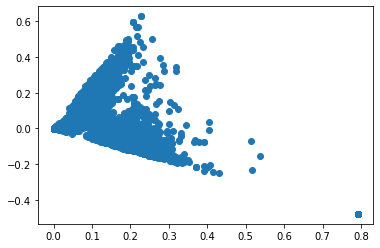

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(svd_matrix[:,0], svd_matrix[:,1])


In [ ]:
from sklearn.cluster import KMeans

# Number of clusters
k = 5

# Initialize KMeans algorithm
kmeans = KMeans(n_clusters=k)

# Fit the model to the data
kmeans.fit(tfidf_matrix)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Print the cluster labels
print(labels)


[3 0 0 ... 0 0 3]


In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


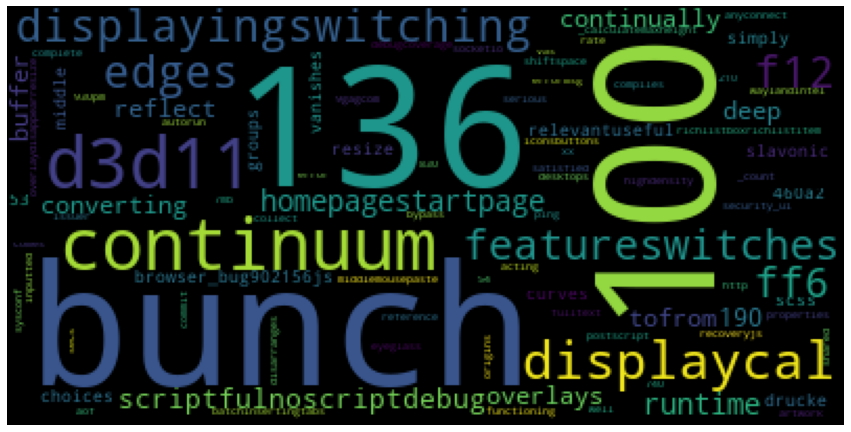

In [ ]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_combined['combined'])

# Create a word cloud from the tf-idf matrix
wordcloud = WordCloud().generate_from_frequencies(dict(zip(vectorizer.get_feature_names(), tfidf_matrix.data)))

# Plot the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from wordcloud import WordCloud


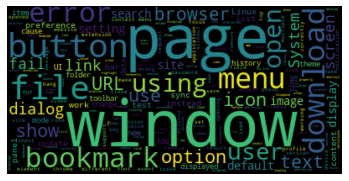

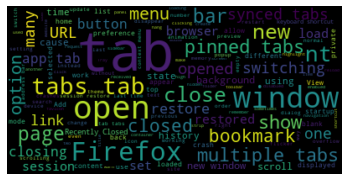

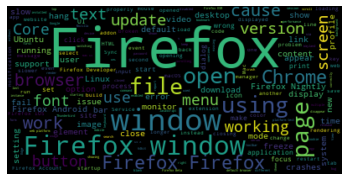

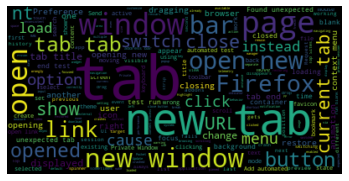

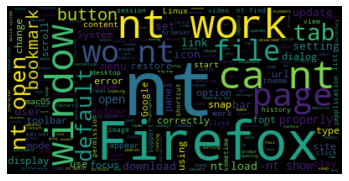

In [ ]:
# Apply k-means to the tf-idf matrix
num_clusters = 5
km = KMeans(n_clusters=num_clusters)
clusters = km.fit_predict(tfidf_matrix)

# Visualize the clusters using word clouds
for i in range(num_clusters):
    wordcloud = WordCloud().generate(' '.join(df_combined['combined'][clusters == i]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


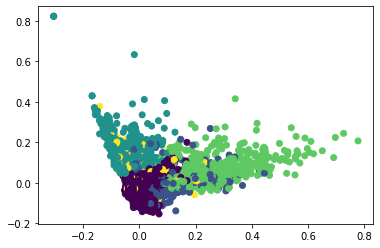

In [ ]:
# Visualize the clusters using heatmap
pca = PCA(n_components=2).fit_transform(tfidf_matrix.todense())
plt.scatter(pca[:, 0], pca[:, 1], c=clusters)
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


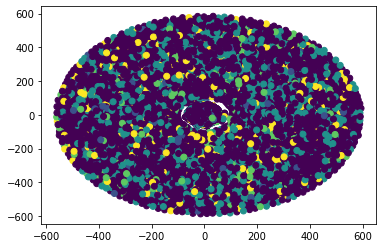

In [ ]:
# Visualize the clusters using t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=5000)
tsne_results = tsne.fit_transform(tfidf_matrix.todense())
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters)
plt.show()


In [ ]:
df_new = pd.concat([df['comp'], df['product'], df['summary'], df['combined']], axis=1)


In [ ]:
df_new1 = pd.get_dummies(df_new, columns=['comp', 'product'])

In [ ]:
df_new1

,summary,combined,comp_Accessibility Tools,comp_Add-ons Manager,comp_Address Bar,comp_Administration,comp_Android,comp_Android Studio and G,comp_Application Update,comp_Apps,...,product_Toolkit,product_User Experience Desi,product_Web Compatibility,product_WebExtensions,product_Websites,product_Webtools,product_bugzilla.mozilla.org,product_mozilla.org,product_support.mozilla.org,product_www.mozilla.org
0,"[Firefox, on, Ubuntu, New, Tab, crashes]","Widget: Gtk Core ['Firefox', 'on', 'Ubuntu', '...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[Enable, FIDO, CTAP2, support, in, Firefox, ni...","DOM: Web Authenticat Core ['Enable', 'FIDO', '...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[Firefox, prompts, two, master, password, dial...","Password Manager Toolkit ['Firefox', 'prompts'...",0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,"[Global, sharing, indicator, blocks, access, t...","Site Permissions Firefox ['Global', 'sharing',...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[Firefox, prioritizes, web, socket, events, ov...","DOM: Networking Core ['Firefox', 'prioritizes'...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,"[Add, gradle, support, for, building, gecko, b...",Android Studio and G Firefox Build System ['Ad...,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,"[Changing, the, orientation, after, swiping, l...","Home screen Firefox for iOS ['Changing', 'the'...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,"[Incorrect, focus, on, ``, input, '', name, fi...","WebPayments UI Firefox ['Incorrect', 'focus', ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,"[Enable, sccache, by, default, when, available]","General Firefox Build System ['Enable', 'sccac...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
tfidf_df = pd.DataFrame(tfidf_matrix.todense(), columns=vectorizer.get_feature_names())
Final_output = pd.concat([df_new1, tfidf_df], axis=1)



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
Final_output.columns

Index(['summary', 'combined', 'comp_Accessibility Tools',
       'comp_Add-ons Manager', 'comp_Address Bar', 'comp_Administration',
       'comp_Android', 'comp_Android Studio and G', 'comp_Application Update',
       'comp_Apps',
       ...
       'zoomed', 'zoomincur', 'zooming', 'zoomminpercent', 'zoomoutcur',
       'zooms', 'zstd', 'zwnj', 'äöü', '类型'],
      dtype='object', length=9984)

In [ ]:
result = 'tfidf_df' in Final_output.columns
print(result)

False


In [ ]:
df_tfidf_column = df['tfidf_column']
result = (df_tfidf_column == tfidf_matrix).all()
print(result)


KeyError: ignored

In [ ]:
import numpy as np

In [ ]:
y = Final_output['summary']
X = Final_output.drop('summary', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

